# Matrix Determinants and Decomposition

Determinants are the clever trick that they figured out to test the quality of a matrix without seeing them. Just by plugging in the numbers from the right positions into the determinant formula, you can figure out if they line up in the one single line, or they part ways shaping a wider span for themselves.

<br/>

The real question is... how did they really manage to figure this sneaky sneaky thing?

## 8.1 The Determinant of a 2 x 2 Matrix

- The determinant of a matrix allows us to map the matrix to a scalar. (It's gotta be $A$ $SQUARE$ $MATRIX!$)
- Enable us to determine whether matrix can be inverted. 

<br />

- For matrix $X$, denoted as $det(X)$
- If $det(X) = 0:
    - Matrix $X^-$$^1$ can't be computed because $X^-$$^1$ has $\frac{1}{det(X)}$ which equals $\frac{1}{0}$  

    - Matrix $X$ is singular: it contains linearly-dependent columns.
- $det(X)$ easiest to calculate for 2x2 matrix. 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Determinant Example 1

In [217]:
X = np.array([[4, 2], [-5, -3]])
X_det = X[0][0] * X[1][1] - X[0][1] * X[1][0]
X_det   # -2 is the determinant of the matrix x.

-2

In [218]:
np.linalg.det(X)

-2.0000000000000013

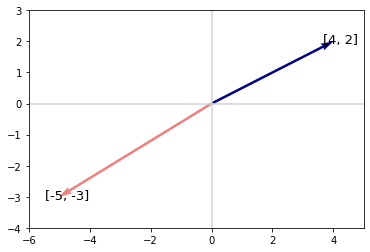

In [219]:
plot_vectors([X[0], X[1]])

### Determinant Example 2 where $det(X) = 0$
- The matrix cannot be inverted.

In [220]:
N = np.array([[-4, 1], [-8, 2]])
np.linalg.det(N)

0.0

In [221]:
N_inv = np.linalg.inv(N)

LinAlgError: ignored

See it for yourself. When it's singular, the determinant is 0.

max <= 0
min >= 0


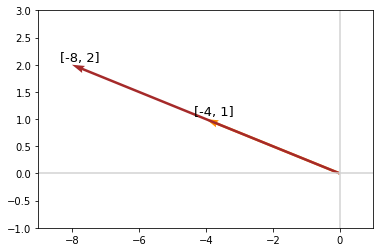

In [169]:
plot_vectors([N[0], N[1]])

## 8.2 The Determinants of Larger Matrices

In [170]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [171]:
np.linalg.det(X)

19.999999999999996

## 8.3 Exercises

In [172]:
ex1 = np.array([[25, 2], [3, 4]])
ex2 = np.array([[-2, 0], [0, -2]])
ex3 = np.array([[2, 1, -3], [4, -5, 2], [0, -1, 3]])

In [173]:
ex1_det = np.linalg.det(ex1)
ex2_det = np.linalg.det(ex2)
ex3_det = np.linalg.det(ex3)

dets = [ex1_det, ex2_det, ex3_det]
for det in dets:
    print(det)

94.0
4.0
-26.000000000000014


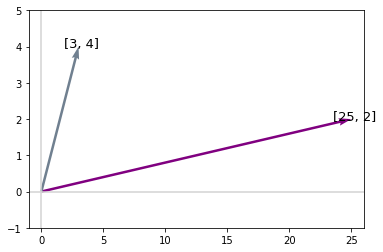

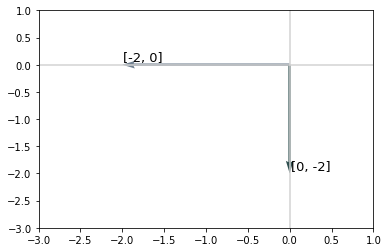

In [224]:
plot_vectors([ex1[0], ex1[1]])
plot_vectors([ex2[0], ex2[1]])

## 8.4 Determinants and Eigenvalues

$det(X)$ = product of all eigenvalues of $X$

<br />

$|det(X)|$ quantifies volumne change as a result of applying $X$:
- If $det(X) = 0$, then $X$ $collapses$ $space$ completely in at least one dimension, thereby eliminating all volume.
- If $0 < det(X) < 1$, then $X$ contracts volumne to some extent.
- If $det(X) = 1$, then $X$ preserves $volumne$ exactly.
- If $det(X) > 1$, then $X$ expands $volumne$ (= 3D).

Notes: don't get confused. $Determinants$ are $for$ $matrices$ (at least 2D), not for vectors (1D). 


In [175]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [176]:
np.linalg.det(X)

19.999999999999996

In [177]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [178]:
np.product(lambdas)

19.99999999999999

In [179]:
np.abs(np.product(lambdas))

19.99999999999999

In [180]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

Text(0.5, 1.0, 'Basis vector')

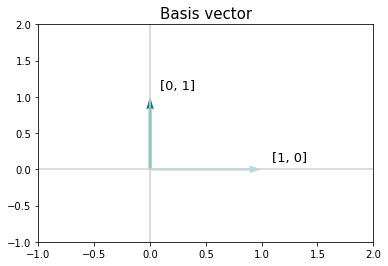

In [215]:
def vectorise(matrix, column):
    return np.array(matrix[:, column]).reshape(-1)

plot_vectors([vectorise(B, 0), vectorise(B, 1)])
plt.title("Basis vector", fontsize=15)

In [182]:
N

array([[-4,  1],
       [-8,  2]])

In [183]:
np.linalg.det(N)

0.0

### Singular matrix and collapsing dimension
Because the matrix $N$ is singular, it cannot be inverted. It collapses the dimensionality of the matrix down to a single dimension. Any vectors would be squashed down onto the one dimension by that singular matrix $N$.

In [184]:
NB = np.dot(N, B)
NB

array([[-4,  1],
       [-8,  2]])

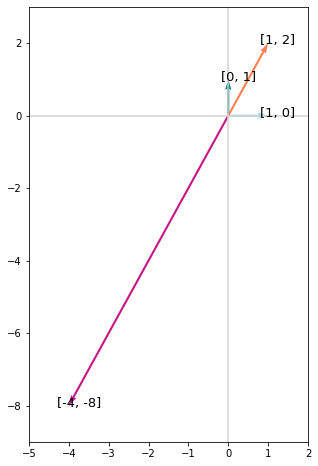

In [214]:
plot_vectors([vectorise(B, 0), vectorise(B, 1), vectorise(NB, 0), vectorise(NB, 1)], figsize=(5, 8))

### Identity matrix

In [186]:
I = np.array([[1, 0], [0, 1]])

In [187]:
np.linalg.det(I)

1.0

In [188]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

min >= 0
min >= 0


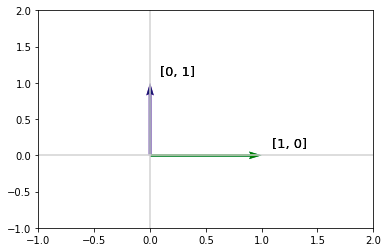

In [189]:
plot_vectors([vectorise(B, 0), vectorise(B, 1), vectorise(IB, 0), vectorise(IB, 1)])

### Diagonal matrix

Here you go, the rule of determinants again:
- If $det(X) = 1$, then $X$ preserves $volumne$ exactly.
So when $determinant = -1$, it's absolute value is 1. So we can expect that the volumne remains preserved, even though the shape is transformed when applied by a matrix with determinant -1. You will see it for yourself in the below example.

In [190]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [191]:
np.linalg.det(J)

-1.0

In [192]:
np.abs(np.linalg.det(J))

1.0

In [193]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

1
-1.0


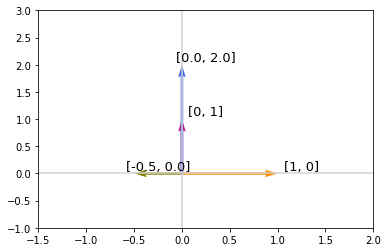

In [213]:
a, b, c, d = vectorise(B, 0), vectorise(B, 1), vectorise(JB, 0), vectorise(JB, 1)
plot_vectors([a, b, c, d])

print(a[0] * b[1])
print(c[0] * d[1])

### Scaling the matrix

In [195]:
doubleI = I * 2
doubleI

array([[2, 0],
       [0, 2]])

In [196]:
doubleIB = np.dot(doubleI, B)
doubleIB

array([[2, 0],
       [0, 2]])

#### the area is quadruppled.

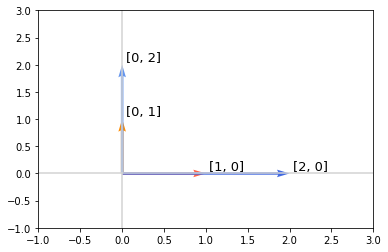

In [212]:
plot_vectors([vectorise(B, 0), vectorise(B, 1), vectorise(doubleIB, 0), vectorise(doubleIB, 1)])

## 8.5 Eigendecomposition

The decomposition of a matrix into eigenvectors and eigenvalues reveals charactersitics of the matrix:
- Matrix is singular if and only if any of its eigenvalues are zero.
- Under specific conditions (see 2.7 of Goodfellow et al., 2016), can optimise quadratic expressions: 
  - Maximum of $f(x) = largest$ $eigenvalue$
  - Minimum of $f(x) = smallest$ $eigenvalue$

The **eigendecomposition** of some matrix $A$ is   
$A = V \Lambda V^{-1}$

Where:
- As in examples above, $V$ is the concatenation of all the eigenvectors of $A$  
- $\Lambda$ (upper-case $\lambda$) is the diagonal matrix diag($\lambda$). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix $A$.



In [198]:
# This was used earlier as a matrix X; it has nice clean integer eigenvalues...
A = np.array([[4, 2], [-5, -3]]) 
A

array([[ 4,  2],
       [-5, -3]])

Text(0.5, 1.0, 'Matrix A')

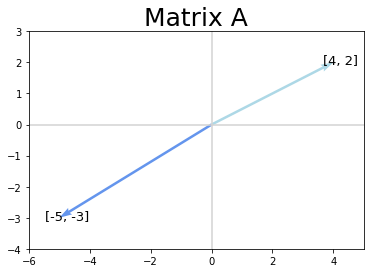

In [210]:
plot_vectors([A[0], A[1]])
plt.title('Matrix A', fontsize=25)

In [200]:
lambdas, V = np.linalg.eig(A)

[ 0.70710678 -0.37139068] [-0.70710678  0.92847669]


Text(0.5, 1.0, 'Eigenvectors of A')

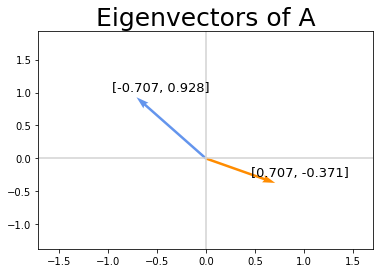

In [209]:
print(V[0], V[1])
plot_vectors([V[0], V[1]])
plt.title("Eigenvectors of A", fontsize=25)

[[2.3570226  0.94280904]
 [1.79505494 1.79505494]]


Text(0.5, 1.0, 'Inverse of Eigenvectors of A')

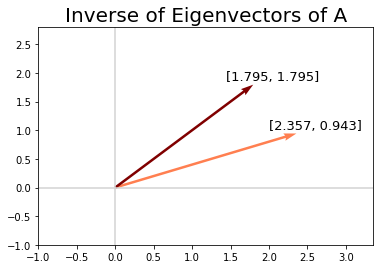

In [208]:
V_inv = np.linalg.inv(V)
print(V_inv)

plot_vectors([V_inv[0], V_inv[1]])
plt.title("Inverse of Eigenvectors of A", fontsize=20)

In [204]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

In [205]:
np.dot(V, np.dot(Lambda, V_inv))

array([[ 4.,  2.],
       [-5., -3.]])

# Plotting vector function

In [207]:
# modified from plot_vectors by Hadrien Jean

def plot_vectors(vectors, values_in="label", figsize=None):
    """
    Arguments

    vectros: a list of vectors. Pass it in in square brackets[] even when plotting just a single vector.
    values_in : the vector values will be labeled around the vector's arround head. 
                if you want to corner the values as a legend, you can pass in values_in="legend".
    figsize : custom size for plot figure

    -----------

    1) This plotter sets the xlim and ylim automatically. The limit is always |1| off the min or max input value.
    2) It chooses the colour for the vector arror automatically everytime you call it. 
    3) ** for future improvement**: totally random combination of colours sometimes is not highly reliable approach to visualie elements. 
        This is due to the degree of contrast. The random colour choice must be refined to randomly choose highly contrastive combinations each time.
    """

    colors = ["lightcoral", "indianred", "brown", "firebrick", "olive", "darkslategrey", 
              "teal", "darkcyan", "lightblue", "blue", "purple", "mediumvioletred", 
              "green", "darkgreen", "forestgreen", "slategrey", "cornflowerblue", 
              "royalblue", "midnightblue", "navy", "darkorchid", "tomato", "coral", 
              "maroon", "darkred", "darkgoldenrod", "darkorange"]
    if (figsize==None):
        plt.figure()
    else:
        plt.figure(figsize=figsize)
    plt.axvline(x=0, color='lightgray', label='Origin')
    plt.axhline(y=0, color='lightgray')

    for vector in vectors:
        x = np.concatenate([[0,0],vector])

        rounded_vector = [np.round(value, 3) for value in vector]

        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[random.randint(0, len(colors))], label=f'{rounded_vector}')    
    
        if (values_in == "label"):        
            plt.annotate(str(rounded_vector), xy=(vector[0] + 0.25, vector[1] + 0.25), ha='center', va='top', c='black', fontsize=13)
        elif (values_in == "legend"):
            plt.legend()


    # sets the xlim and ylim automatically.
    flat_x = []
    flat_y = []
    for vector in vectors:
        flat_x.append(vector[0])
        flat_y.append(vector[1])

    max_x = np.max(flat_x)
    min_x = np.min(flat_x)
    max_y = np.max(flat_y)
    min_y = np.min(flat_y)

    if (max_x <= 0):
        plt.xlim(min_x - 1, 1)
    elif (min_x >= 0):
        plt.xlim(-1, max_x + 1)
    else: 
        plt.xlim(min_x - 1, max_x + 1)

    if (max_y <= 0):
        plt.ylim(min_y - 1, 1)
    elif (min_y >= 0):
        plt.ylim(-1, max_y + 1)
    else:
        plt.ylim(min_y - 1, max_y + 1)